In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
singles = pd.read_hdf("singles_230801.h5")
singles.head()

,NAME,OLD_SPT,WAVE,FLUX,UNCERTAINTY,J_SNR,MKO_J,MKO_H,MKO_K,2MASS_J,2MASS_H,2MASS_KS,SPT
0,2MASS J11304030+1206306,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,10.28,9.756188,9.363207,10.318813,9.706062,9.380460,M6.0
1,GAT 1370,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,10.28,9.843838,9.431730,10.327964,9.784580,9.454359,M7.0
2,2MASS J04314644+2506236,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,10.28,9.758637,9.359883,10.321691,9.701496,9.382371,M6.0
3,2MASS J01405263+0453302,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,10.28,9.767727,9.404947,10.314496,9.720459,9.430291,M6.0
4,V* FW Tau,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,10.28,9.745862,9.373990,10.321529,9.687609,9.395473,M6.0


In [3]:
singles.dropna().shape #no missing values

(1049, 13)

In [4]:
standards = pd.read_hdf("standards_230801.h5").reset_index(drop = True)
standards.head()

,NAME,SPT,WAVE,FLUX,UNCERTAINTY,J_SNR,MKO_J,MKO_H,MKO_K,2MASS_J,2MASS_H,2MASS_KS
0,Wolf 47,M5.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[6.335858970763201e-10, 6.407552060024735e-10,...","[6.174749861761518e-12, 6.033063547110708e-12,...",337.328003,9.250000,8.725223,8.405778,9.281501,8.683780,8.422115
1,LHS 1375,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.1164212769767142e-10, 2.1783089170223314e-1...","[1.88434457693849e-12, 2.0135316233629004e-12,...",196.461166,10.280000,9.765880,9.378366,10.318862,9.717622,9.396670
2,VB 8,M7.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.372959655772379e-10, 1.428143063324856e-10,...","[5.9692609153231e-13, 6.063794446734808e-13, 6...",572.586731,10.593666,10.133086,9.725818,10.639969,10.080488,9.743243
3,VB 10,M8.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[7.234550703618362e-11, 7.634547468658174e-11,...","[3.872360279446258e-13, 3.9600454928403235e-13...",528.510681,10.988594,10.446856,9.960890,11.033639,10.387670,9.978103
4,LHS 2924,M9.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[4.154957755161757e-11, 4.393306217053341e-11,...","[3.026110914887634e-13, 3.169087891092728e-13,...",367.040649,11.308431,10.689916,10.103566,11.345186,10.624095,10.120251


In [5]:
singles["SPT"].str[0].value_counts()

SPT
L    538
M    339
T    172
Name: count, dtype: int64

In [6]:
flux_vals = pd.DataFrame(singles['FLUX'].to_list(), columns=[f'FLUX_{i}' for i in range(409)])
flux_vals

,FLUX_0,FLUX_1,FLUX_2,FLUX_3,FLUX_4,FLUX_5,FLUX_6,FLUX_7,FLUX_8,FLUX_9,...,FLUX_399,FLUX_400,FLUX_401,FLUX_402,FLUX_403,FLUX_404,FLUX_405,FLUX_406,FLUX_407,FLUX_408
0,1.966063e-10,2.113104e-10,2.215433e-10,2.269169e-10,2.322451e-10,2.340153e-10,2.264532e-10,2.183886e-10,2.115621e-10,2.069354e-10,...,5.567336e-11,5.740236e-11,5.390640e-11,5.251170e-11,5.513286e-11,5.493691e-11,5.639457e-11,5.432719e-11,5.391179e-11,5.327284e-11
1,1.995077e-10,2.079591e-10,2.186989e-10,2.314572e-10,2.396579e-10,2.406922e-10,2.316760e-10,2.244714e-10,2.172734e-10,2.145852e-10,...,5.591276e-11,5.510603e-11,5.385560e-11,5.270259e-11,5.162297e-11,5.110227e-11,5.155890e-11,5.132251e-11,5.090229e-11,4.999533e-11
2,1.976291e-10,2.058053e-10,2.110781e-10,2.208615e-10,2.230184e-10,2.221202e-10,2.202383e-10,2.149109e-10,2.121254e-10,2.125676e-10,...,6.030007e-11,5.930177e-11,5.825345e-11,5.708731e-11,5.563603e-11,5.537576e-11,5.549699e-11,5.508036e-11,5.505448e-11,5.516143e-11
3,2.287852e-10,2.370316e-10,2.375884e-10,2.509034e-10,2.579899e-10,2.514759e-10,2.553226e-10,2.390649e-10,2.428736e-10,2.483194e-10,...,5.932869e-11,5.623817e-11,5.618077e-11,5.312362e-11,5.069763e-11,5.341758e-11,5.426651e-11,5.488549e-11,5.353450e-11,5.553981e-11
4,2.061867e-10,2.142867e-10,2.222571e-10,2.337803e-10,2.400063e-10,2.379782e-10,2.291644e-10,2.187137e-10,2.130538e-10,2.069773e-10,...,5.953048e-11,5.892096e-11,5.671666e-11,5.483825e-11,5.366042e-11,5.395389e-11,5.447250e-11,5.488026e-11,5.409111e-11,5.382424e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2.313982e-13,1.246238e-13,8.972974e-14,4.265471e-13,2.866291e-13,6.806472e-14,1.484016e-13,1.241821e-13,1.547150e-13,7.454638e-14,...,1.082682e-13,3.206458e-14,2.926112e-14,7.741085e-14,-7.055257e-15,6.313737e-14,1.196562e-14,1.701113e-13,-1.241861e-14,7.041690e-14
1045,5.244854e-14,6.580744e-14,7.174799e-14,9.208437e-14,9.605482e-14,8.874525e-14,8.907351e-14,9.499554e-14,7.442492e-14,4.500412e-14,...,1.211383e-14,1.618761e-14,1.507172e-14,-1.219934e-15,-1.141334e-14,-4.224110e-15,1.857852e-15,1.312781e-15,2.107446e-15,1.078067e-14
1046,-2.261458e-14,5.872130e-14,8.086862e-14,1.363968e-13,9.682284e-14,6.840073e-14,7.941230e-14,3.186888e-14,4.647245e-14,1.493484e-13,...,-2.968672e-15,6.305976e-15,-1.670164e-14,-6.519861e-15,-9.100989e-15,-2.203045e-14,-8.750551e-15,-1.361205e-14,-1.478014e-14,4.460326e-15
1047,1.467886e-14,1.789743e-14,1.684622e-14,2.291370e-14,2.739319e-14,2.837789e-14,2.727773e-14,2.391738e-14,1.773882e-14,1.119925e-14,...,2.671819e-16,-4.450959e-16,-2.573074e-15,-1.456679e-15,-3.909625e-15,-6.703809e-16,-2.492077e-16,-5.122546e-17,-2.611775e-16,2.406627e-15


In [7]:
flux_vals.max().max()

2.8619753398110217e-10

In [8]:
flux_vals.min().min()

-8.54123601334018e-12

In [9]:
min_0_flux = flux_vals - flux_vals.min().min() #make minimum value 0
min_0_flux.min().min()

0.0

In [10]:
min_0_flux.max().max()

2.9473876999444234e-10

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaled_flux = scaler.fit_transform(flux_vals)
scaled_flux.shape

(1049, 409)

(array([2.0000e+00, 1.0000e+00, 1.0000e+00, 6.6390e+03, 9.8040e+03,
        1.4581e+04, 1.7424e+04, 1.5286e+04, 2.4124e+04, 2.2653e+04,
        2.2912e+04, 9.5400e+03, 8.5340e+03, 3.7990e+03, 5.7340e+03,
        4.2080e+03, 7.4200e+03, 7.7920e+03, 8.2120e+03, 1.1659e+04,
        1.4707e+04, 1.8441e+04, 1.7153e+04, 1.2774e+04, 8.4610e+03,
        4.7730e+03, 2.8480e+03, 2.0560e+03, 1.5180e+03, 1.9620e+03,
        2.1850e+03, 2.0440e+03, 1.5810e+03, 2.9370e+03, 3.2900e+03,
        3.7440e+03, 4.3240e+03, 4.2550e+03, 4.0900e+03, 4.5460e+03,
        5.1850e+03, 7.7420e+03, 1.2973e+04, 1.5563e+04, 1.0373e+04,
        6.7020e+03, 4.7130e+03, 3.0250e+03, 2.0560e+03, 1.8140e+03,
        1.6400e+03, 1.4760e+03, 1.3380e+03, 1.3600e+03, 1.4260e+03,
        1.8230e+03, 2.1790e+03, 2.6670e+03, 3.5050e+03, 3.6260e+03,
        2.1970e+03, 1.4230e+03, 8.8600e+02, 6.2500e+02, 4.3700e+02,
        3.4100e+02, 3.1800e+02, 4.1900e+02, 4.8600e+02, 5.2900e+02,
        6.7500e+02, 7.5000e+02, 8.1200e+02, 9.56

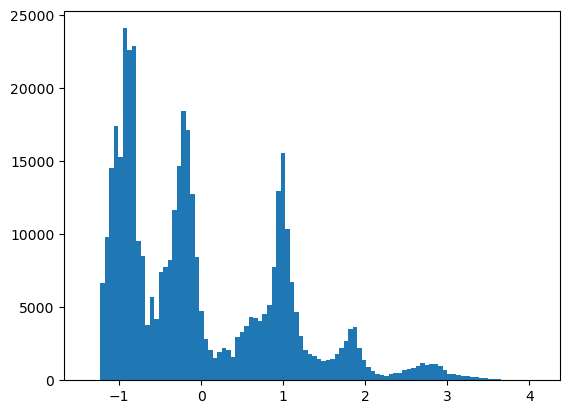

In [13]:
plt.hist(scaled_flux.flatten(), bins = 100)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [15]:
new_spt = singles["SPT"].str[0]
singles["SPT"] = new_spt

In [16]:
singles_drop = singles.drop(columns = ["NAME", "OLD_SPT", "WAVE", "FLUX", "UNCERTAINTY"])
singles_w_flux_vals = pd.concat([singles_drop, flux_vals], axis = 1)
singles_w_flux_vals.head()

,J_SNR,MKO_J,MKO_H,MKO_K,2MASS_J,2MASS_H,2MASS_KS,SPT,FLUX_0,FLUX_1,...,FLUX_399,FLUX_400,FLUX_401,FLUX_402,FLUX_403,FLUX_404,FLUX_405,FLUX_406,FLUX_407,FLUX_408
0,94.018303,10.28,9.756188,9.363207,10.318813,9.706062,9.380460,M,1.966063e-10,2.113104e-10,...,5.567336e-11,5.740236e-11,5.390640e-11,5.251170e-11,5.513286e-11,5.493691e-11,5.639457e-11,5.432719e-11,5.391179e-11,5.327284e-11
1,386.537811,10.28,9.843838,9.431730,10.327964,9.784580,9.454359,M,1.995077e-10,2.079591e-10,...,5.591276e-11,5.510603e-11,5.385560e-11,5.270259e-11,5.162297e-11,5.110227e-11,5.155890e-11,5.132251e-11,5.090229e-11,4.999533e-11
2,204.598099,10.28,9.758637,9.359883,10.321691,9.701496,9.382371,M,1.976291e-10,2.058053e-10,...,6.030007e-11,5.930177e-11,5.825345e-11,5.708731e-11,5.563603e-11,5.537576e-11,5.549699e-11,5.508036e-11,5.505448e-11,5.516143e-11
3,91.589699,10.28,9.767727,9.404947,10.314496,9.720459,9.430291,M,2.287852e-10,2.370316e-10,...,5.932869e-11,5.623817e-11,5.618077e-11,5.312362e-11,5.069763e-11,5.341758e-11,5.426651e-11,5.488549e-11,5.353450e-11,5.553981e-11
4,414.787994,10.28,9.745862,9.373990,10.321529,9.687609,9.395473,M,2.061867e-10,2.142867e-10,...,5.953048e-11,5.892096e-11,5.671666e-11,5.483825e-11,5.366042e-11,5.395389e-11,5.447250e-11,5.488026e-11,5.409111e-11,5.382424e-11


In [17]:
X = singles_w_flux_vals.drop("SPT", axis = 1)
y = singles_w_flux_vals["SPT"]

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
preds = rf_classifier.predict(X_test)
preds[:5]

array(['L', 'T', 'L', 'T', 'M'], dtype=object)

In [18]:
ACC = np.mean(preds == y_test)

print(f"RF ACCURACY: {ACC}")

RF ACCURACY: 0.9682539682539683


## Hyperparameter Tuning (Grid Search)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
y_train.value_counts()

SPT
L    378
M    233
T    123
Name: count, dtype: int64

In [21]:
rf_parameters = {'n_estimators': [50, 100, 200, 500],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 5, 10],
                 'max_depth' : [5, 7, 9, 10]}

CV_rfc = GridSearchCV(estimator = rf_classifier, param_grid = rf_parameters, scoring = 'accuracy', cv = 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [22]:
CV_rfc.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [25]:
rf_classifier = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf_classifier.fit(X_train, y_train)
preds = rf_classifier.predict(X_test)
preds[:5]

array(['L', 'T', 'L', 'T', 'M'], dtype=object)

In [26]:
ACC = np.mean(preds == y_test)

print(f"RF ACCURACY: {ACC}")

RF ACCURACY: 0.9682539682539683


In [27]:
preds = CV_rfc.predict(X_test)
preds[:5]

array(['L', 'T', 'L', 'T', 'M'], dtype=object)

In [28]:
ACC = np.mean(preds == y_test)

print(f"RF ACCURACY: {ACC}") #uses last hyperparam configuration it trained on

RF ACCURACY: 0.9650793650793651
